In [300]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import math

## Part A

In [301]:
dataset = np.load('assignment22.npy')

In [302]:
x = dataset[:,0]
y = dataset[:,1]

### linear regression

In [303]:
## 2/N (-xT y + mxTx + xTb)
def dMSE_dm(x, y, m, b):
    N = len(x)
    b_hat = np.full((N),b)
    return (2 / N) * (-x.T.dot(y) + m * x.T.dot(x) + x.T.dot(b_hat))
    
def dMSE_db(x, y, m, b):
    N = len(y)
    one = np.ones(N)
    b_hat = np.full((N),b)
    return (2 / N) * (-one.T.dot(y) + m * one.T.dot(x) + one.T.dot(b_hat))

def run_gradient_descent_conv(alpha, steps, x0, y0, m, b):
    
    dists = [] 
    fvals = []
    
    mm = []
    bb = []
    
    for k in range(steps):
        temp_0 = m - alpha * dMSE_dm(x0, y0, m, b)
        temp_1 = b - alpha * dMSE_db(x0, y0, m, b)
        m = temp_0
        b = temp_1
        
        mm.append(m)
        bb.append(b)
        
        check = math.sqrt((dMSE_dm(x0, y0, m, b))**2 + (dMSE_db(x0, y0, m, b))**2)
        precision = 10 ** (-5)
        if check < precision:
            pass

    return mm, bb

In [304]:
m_init = random.uniform(0.1,2)
b_init = random.uniform(0.1,100)

steps = 50
alpha = 0.1

In [305]:
mm, bb = run_gradient_descent_conv(alpha, steps, x, y, m_init, b_init)  ##TODO: update initial values

In [306]:
mm[-1]

2.817644022714065

In [307]:
bb[-1]

14.216318097391737

In [308]:
a = np.array([1,2,3])
b = np.array([1,2,3])

In [309]:
blah = np.array([1,2,3,4,5])
blah ** 2

array([ 1,  4,  9, 16, 25])

### quadratic regression

In [310]:
#def dMSE_dm(x, y, m, b):
#    N = len(x)
#    b_hat = np.full((N),b)
#    return (2 / N) * (-x.T.dot(y) + m * x.T.dot(x) + x.T.dot(b_hat))

def dMSE_dm1(x, y, m1, m2, b):
    N = len(x)
    b_hat = np.full((N),b)
    return (2 / N) * (-x.T.dot(y) + m1 * x.T.dot(x) + m2 * (x.T.dot(x**2)) + x.T.dot(b_hat))
    
def dMSE_dm2(x, y, m1, m2, b):
    N = len(x)
    b_hat = np.full((N),b)
    return (2 / N) * (-(x**2).T.dot(y) + m1 * (x**2).T.dot(x) + m2 * (x**2).T.dot(x**2) + (x**2).T.dot(b_hat))
    
def dMSE_db(x, y, m1, m2, b):
    N = len(y)
    one = np.ones(N)
    b_hat = np.full((N),b)
    return (2 / N) * (-one.T.dot(y) + m1 * one.T.dot(x) + m2 * one.T.dot(x**2) + one.T.dot(b_hat))

def run_gradient_descent_conv(alpha, steps, x0, y0, m1, m2, b):
    mm1 = []
    mm2 = []
    bb = []
    
    for k in range(steps):
        temp_m1 = m1 - alpha * dMSE_dm1(x0, y0, m1, m2, b)
        temp_m2 = m2 - alpha * dMSE_dm2(x0, y0, m1, m2, b)
        temp_b = b - alpha * dMSE_db(x0, y0, m1, m2, b)
        
        m1 = temp_m1
        m2 = temp_m2
        b = temp_b
        
        mm1.append(m1)
        mm2.append(m2)
        bb.append(b)

    return mm1, mm2, bb

In [311]:
m1_init = random.uniform(0.1,2)
m2_init = random.uniform(0.1,2)
b_init = random.uniform(0.1,100)

alpha = 0.01
steps = 500

mm1, mm2, bb = run_gradient_descent_conv(alpha, steps, x, y, m1_init, m2_init, b_init)

mm1[-1], mm2[-1], bb[-1]

(3.459428325147646e+64, 1.5439743323527471e+66, 1.1506466613136348e+65)

## Part B

f(x,y) = (x+2y-7)^2 + (2x+y-5)^2

In [312]:
def f(x,y):
    return (x + 2* y - 7) ** 2 + (2 * x + y - 5) ** 2

def df_dx(x,y):
    return 10*x + 8*y - 34
    
def df_dy(x,y):
    return 8*x + 10*y - 38

def run_gradient_descent_conv(alpha, steps, x, y):
    trajectories = [(x,y)]

    for k in range(steps):
        temp_x = x - alpha * df_dx(x,y)
        temp_y = y - alpha * df_dy(x,y)
        
        x = temp_x
        y = temp_y
        
        trajectories.append((x,y))
    
    return trajectories

In [313]:
x0 = 0
y0 = -10

steps = 200
alpha = 0.01

traj = run_gradient_descent_conv(alpha, steps, x0, y0)

In [314]:
traj

[(0, -10),
 (1.1400000000000001, -8.62),
 (2.0556, -7.469199999999999),
 (2.787576, -6.506727999999999),
 (3.36935664, -5.699061279999999),
 (3.8283458784, -5.018703683199999),
 (4.187007585216, -4.443100985151999),
 (4.463754905506559, -3.9537514934540794),
 (4.67367953443223, -3.5354767365491964),
 (4.829149719912943, -3.175823425648855),
 (4.940300621973557, -2.864573060677005),
 (5.0154364046303614, -2.5933398043671887),
 (5.0613599485167, -2.3552407363008987),
 (5.083643212569102, -2.1446254585521447),
 (5.086848927996364, -1.9568543697024583),
 (5.0747123847729245, -1.7881168469719215),
 (5.050290494053386, -1.6352821530565633),
 (5.016084016892573, -1.4957771772751778),
 (4.97413778938533, -1.367486180899066),
 (4.9261229049187225, -1.2486685859599858),
 (4.873404101303649, -1.137891559757485),
 (4.817095015953883, -1.0339747318860284),
 (4.758103492909377, -0.9359448599737362),
 (4.697168732416338, -0.8429986534091127),
 (4.634891751447433, -0.7544722866615085),
 (4.57176035923

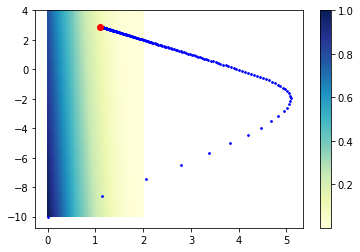

In [315]:
nrpts = 50
xs = np.linspace(0, 2, num = nrpts)
ys = np.linspace(-10, 4, num = nrpts)

heatmap = np.zeros((50, 50), dtype = float)
for i in range(50):
    for j in range(50):
        heatmap[i,j] = f(xs[i], ys[j])
        
heatmap = heatmap / np.max(np.max(heatmap))

cmap = plt.get_cmap('YlGnBu')
fig, ax = plt.subplots()
xsf = np.meshgrid(xs, ys)[0]
ysf = np.meshgrid(xs, ys)[1]
im = ax.pcolormesh(xsf, ysf, heatmap, cmap=cmap )
fig.colorbar(im, ax=ax)

#for i in range(len(traj)):
plt.scatter([i[0] for i in traj], [i[1] for i in traj], s=3, c='b')

plt.plot(traj[-1][0], traj[-1][1], 'ro')

plt.show()

In [318]:
x = np.array([0, -10])
np.linalg.norm(x)

10.0

In [ ]:
x = np.array([0, -10])
alpha = 0.01
steps = 100
dists = []
fvals = [] 

In [ ]:
def descent_step(t, x, grad):
    xk = x  - t * grad
    return xk

def run_gradient_descent_traj(alpha, steps, x0, Q, b, xstar):
    lambdamax = np.max( np.linalg.eigvals(Q) )
    x = x0
    
    traj = [] #computed trajectory
    
    for k in range(steps):
        grad = quadratic_grad(Q, b, x)
        xk = descent_step(alpha, x, grad)
        x = xk
        traj.append(x)
        
    return np.vstack(traj)